In [136]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.patches as patches
from plotting import *
from utils import *
import csv

In [158]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [159]:
style_size = 'presentation'

## Load Data

In [169]:
data_by_file = {}
file_list = ['1a_demographics.csv','1a_usability.csv','1a_comparison.csv','1b_demographics.csv','1b_usability.csv','1b_comparison.csv']

for file_path in file_list:
    with open('study_1/'+file_path, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        data_by_file[file_path] = [row for row in reader]

## Demographics


In [228]:
demographic_fields = ['Computer/Phone for Sessions','Gen AI for assistance','Gen AI in general'][::-1]
demographic_1a = [[i[field] for i in data_by_file['1a_demographics.csv'] ] for field in demographic_fields]
categories = ["Never", "Rarely","Sometimes", "Sometimes", "Always"]
normalized_results_1a = [get_normalized(i) for i in demographic_1a]
x_values_1a = [[i for j in range(len(normalized_results_1a[i]))] for i in range(len(normalized_results_1a))]

In [229]:
demographic_fields_1b = ['Gen AI for assistance','Gen AI in general'][::-1]
demographic_1b = [[i[field] for i in data_by_file['1b_demographics.csv'] ] for field in demographic_fields_1b]
categories = ["Never", "Rarely","Sometimes", "Sometimes", "Always"]
normalized_results_1b = [get_normalized(i) for i in demographic_1b]
x_values_1b = [[i for j in range(len(normalized_results_1b[i]))] for i in range(len(normalized_results_1b))]

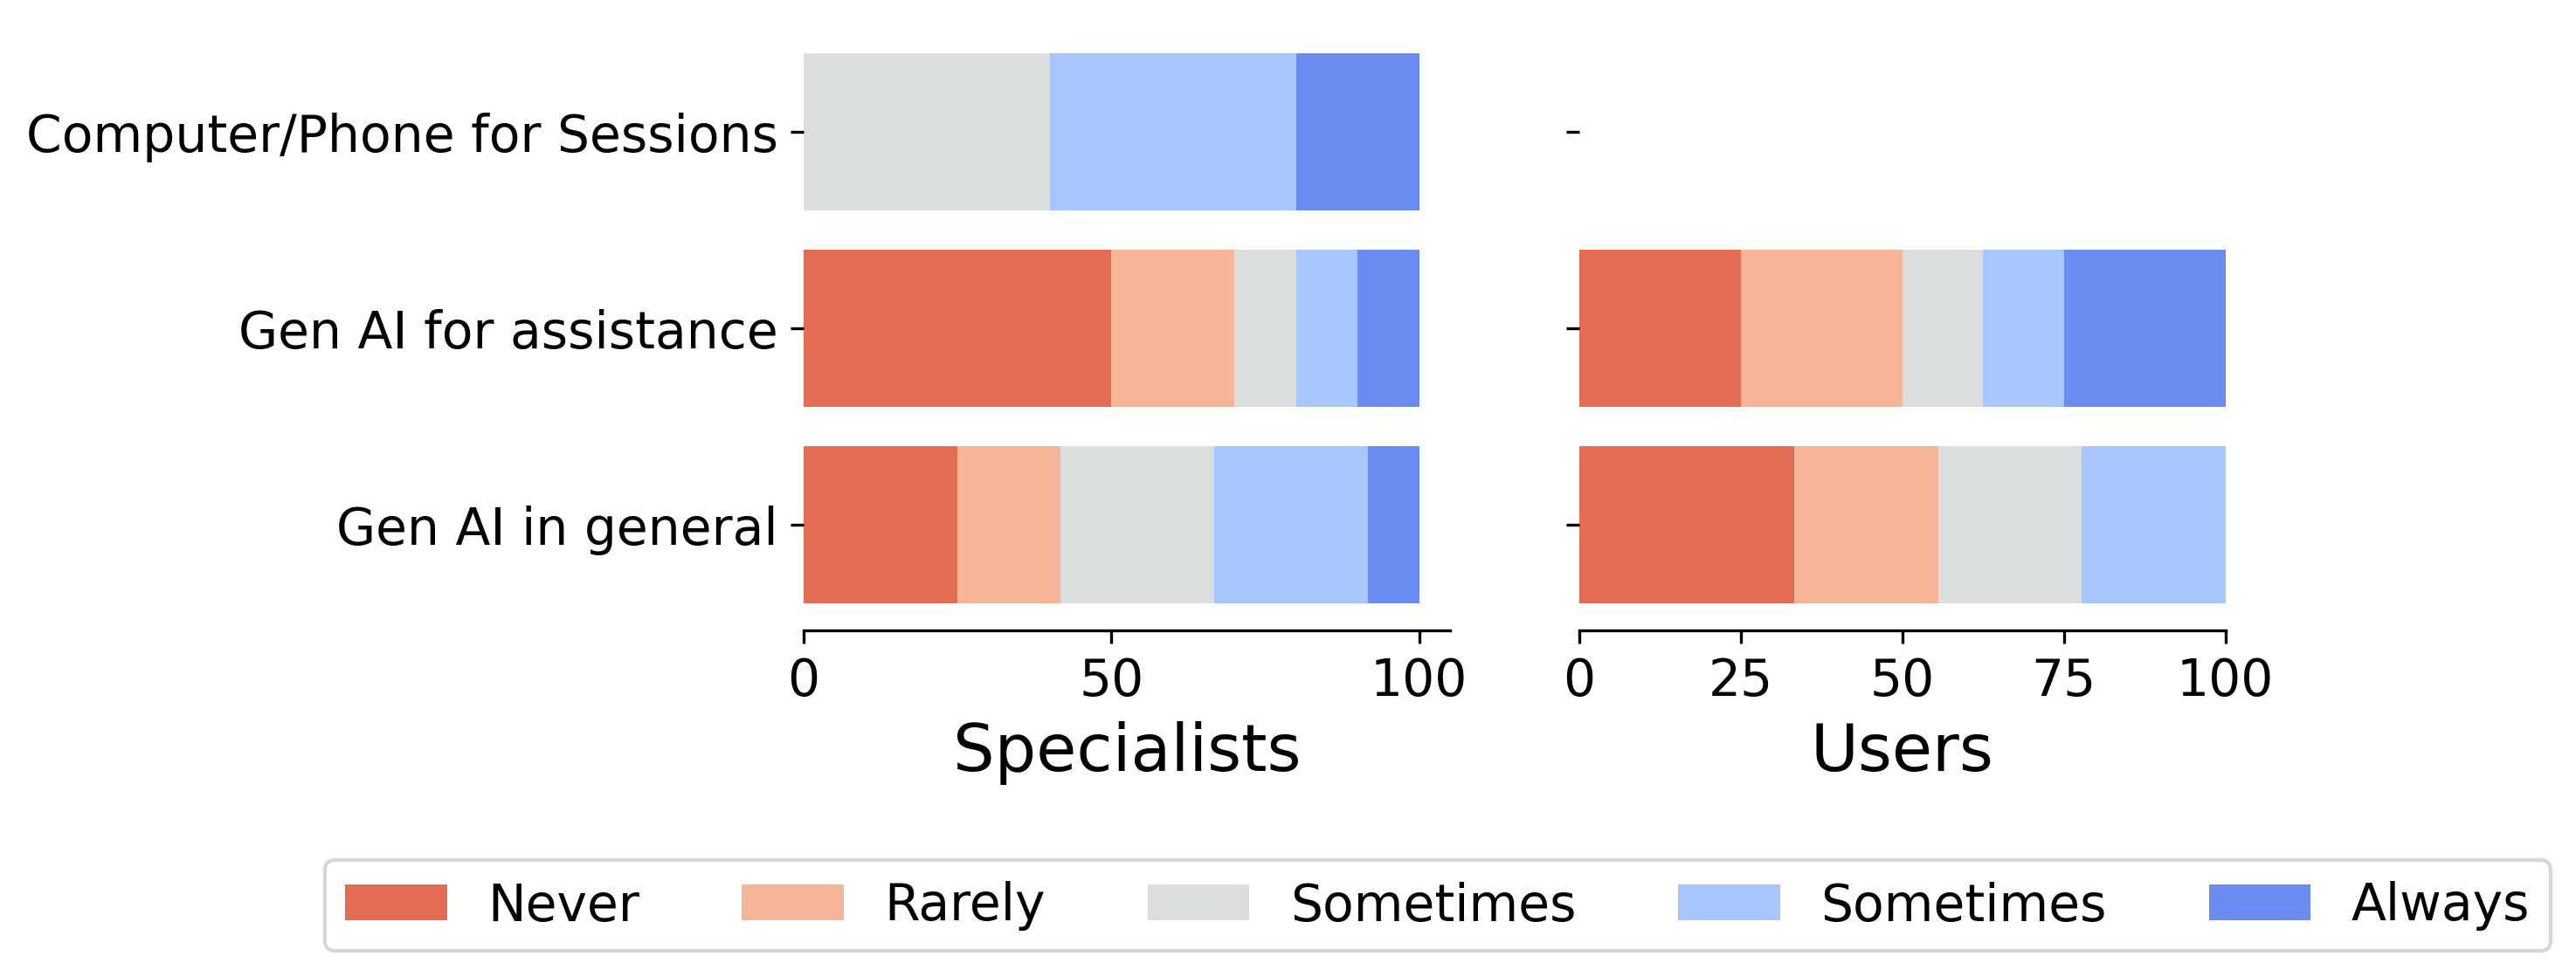

In [238]:
plot_dimensions = (1,2)
y_labels = [["",""]]
x_labels = [["Specialists","Users"]]
titles = [["",""]]
overall_format = {'figsize':(7,3),
    'style_size': style_size,
    'y_ticks': [[[[0,1,2],demographic_fields],[[0,1,2],["","",""]]]],
    'hide_spines': True,
    'hide_y_spine': True, 
}

fig,ax = create_axes(plot_dimensions,overall_format,y_labels=y_labels,titles=titles,x_labels=x_labels)
bar_format = {'style_size': style_size,'color_palette': 'five_color_blue_red', 'horizontal': True}

plot_stacked_bar(ax[0][0],x_values_1a,normalized_results_1a,categories,bar_format)
plot_stacked_bar(ax[0][1],x_values_1a, normalized_results_1b+[[0 for i in range(5)]],categories,bar_format)

legend_format = {'style_size': style_size,'type': 'is_global', 'loc': 'upper left', 'ncol': 5, 'bbox_to_anchor': (-0.15,-0.15)}
create_legend(fig,ax,plot_dimensions,legend_format)

fig.savefig("figures/demographic_general.pdf",dpi=300, bbox_inches='tight')

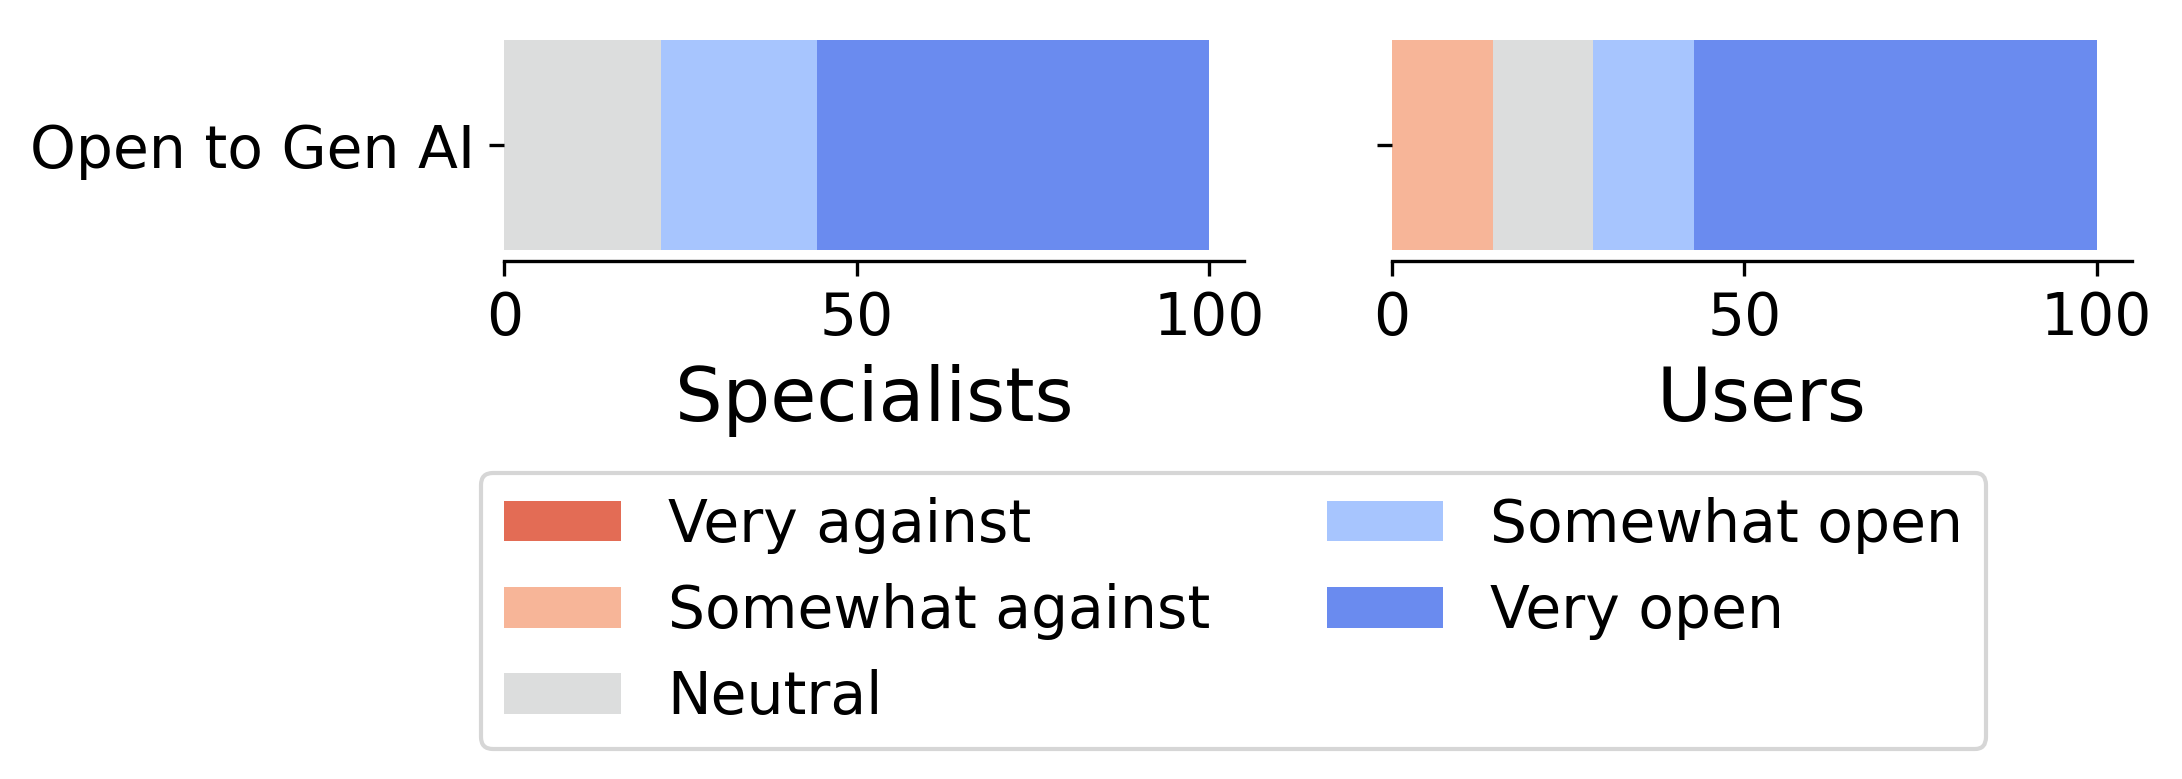

In [241]:
plot_dimensions = (1,2)
y_labels = [["",""]]
x_labels = [["Specialists","Users"]]
titles = [["",""]]
overall_format = {'figsize':(7,1),
    'style_size': style_size,
    'y_ticks': [[[[0],['Open to Gen AI']],[[0],[""]]]],
    'hide_spines': True,
    'hide_y_spine': True, 
}

fig,ax = create_axes(plot_dimensions,overall_format,y_labels=y_labels,titles=titles,x_labels=x_labels)
bar_format = {'style_size': style_size,'color_palette': 'five_color_blue_red', 'horizontal': True}

demographic_fields = ['Open to Gen AI']
for i, study in enumerate(['1a_demographics.csv','1b_demographics.csv']):
    demographic = [[i[field] for i in data_by_file[study] ] for field in demographic_fields]
    categories = ["Very against", "Somewhat against","Neutral", "Somewhat open", "Very open"]
    normalized_results = [get_normalized(i) for i in demographic]
    x_values = [[i for j in range(len(normalized_results[i]))] for i in range(len(normalized_results))]
    plot_stacked_bar(ax[0][i],x_values,normalized_results,categories,bar_format)

legend_format = {'style_size': style_size,'type': 'is_global', 'loc': 'upper left', 'ncol': 2, 'bbox_to_anchor': (0.1,-0.5)}
create_legend(fig,ax,plot_dimensions,legend_format)

fig.savefig("figures/demographic_open.pdf",dpi=300, bbox_inches='tight')

## Usability Results

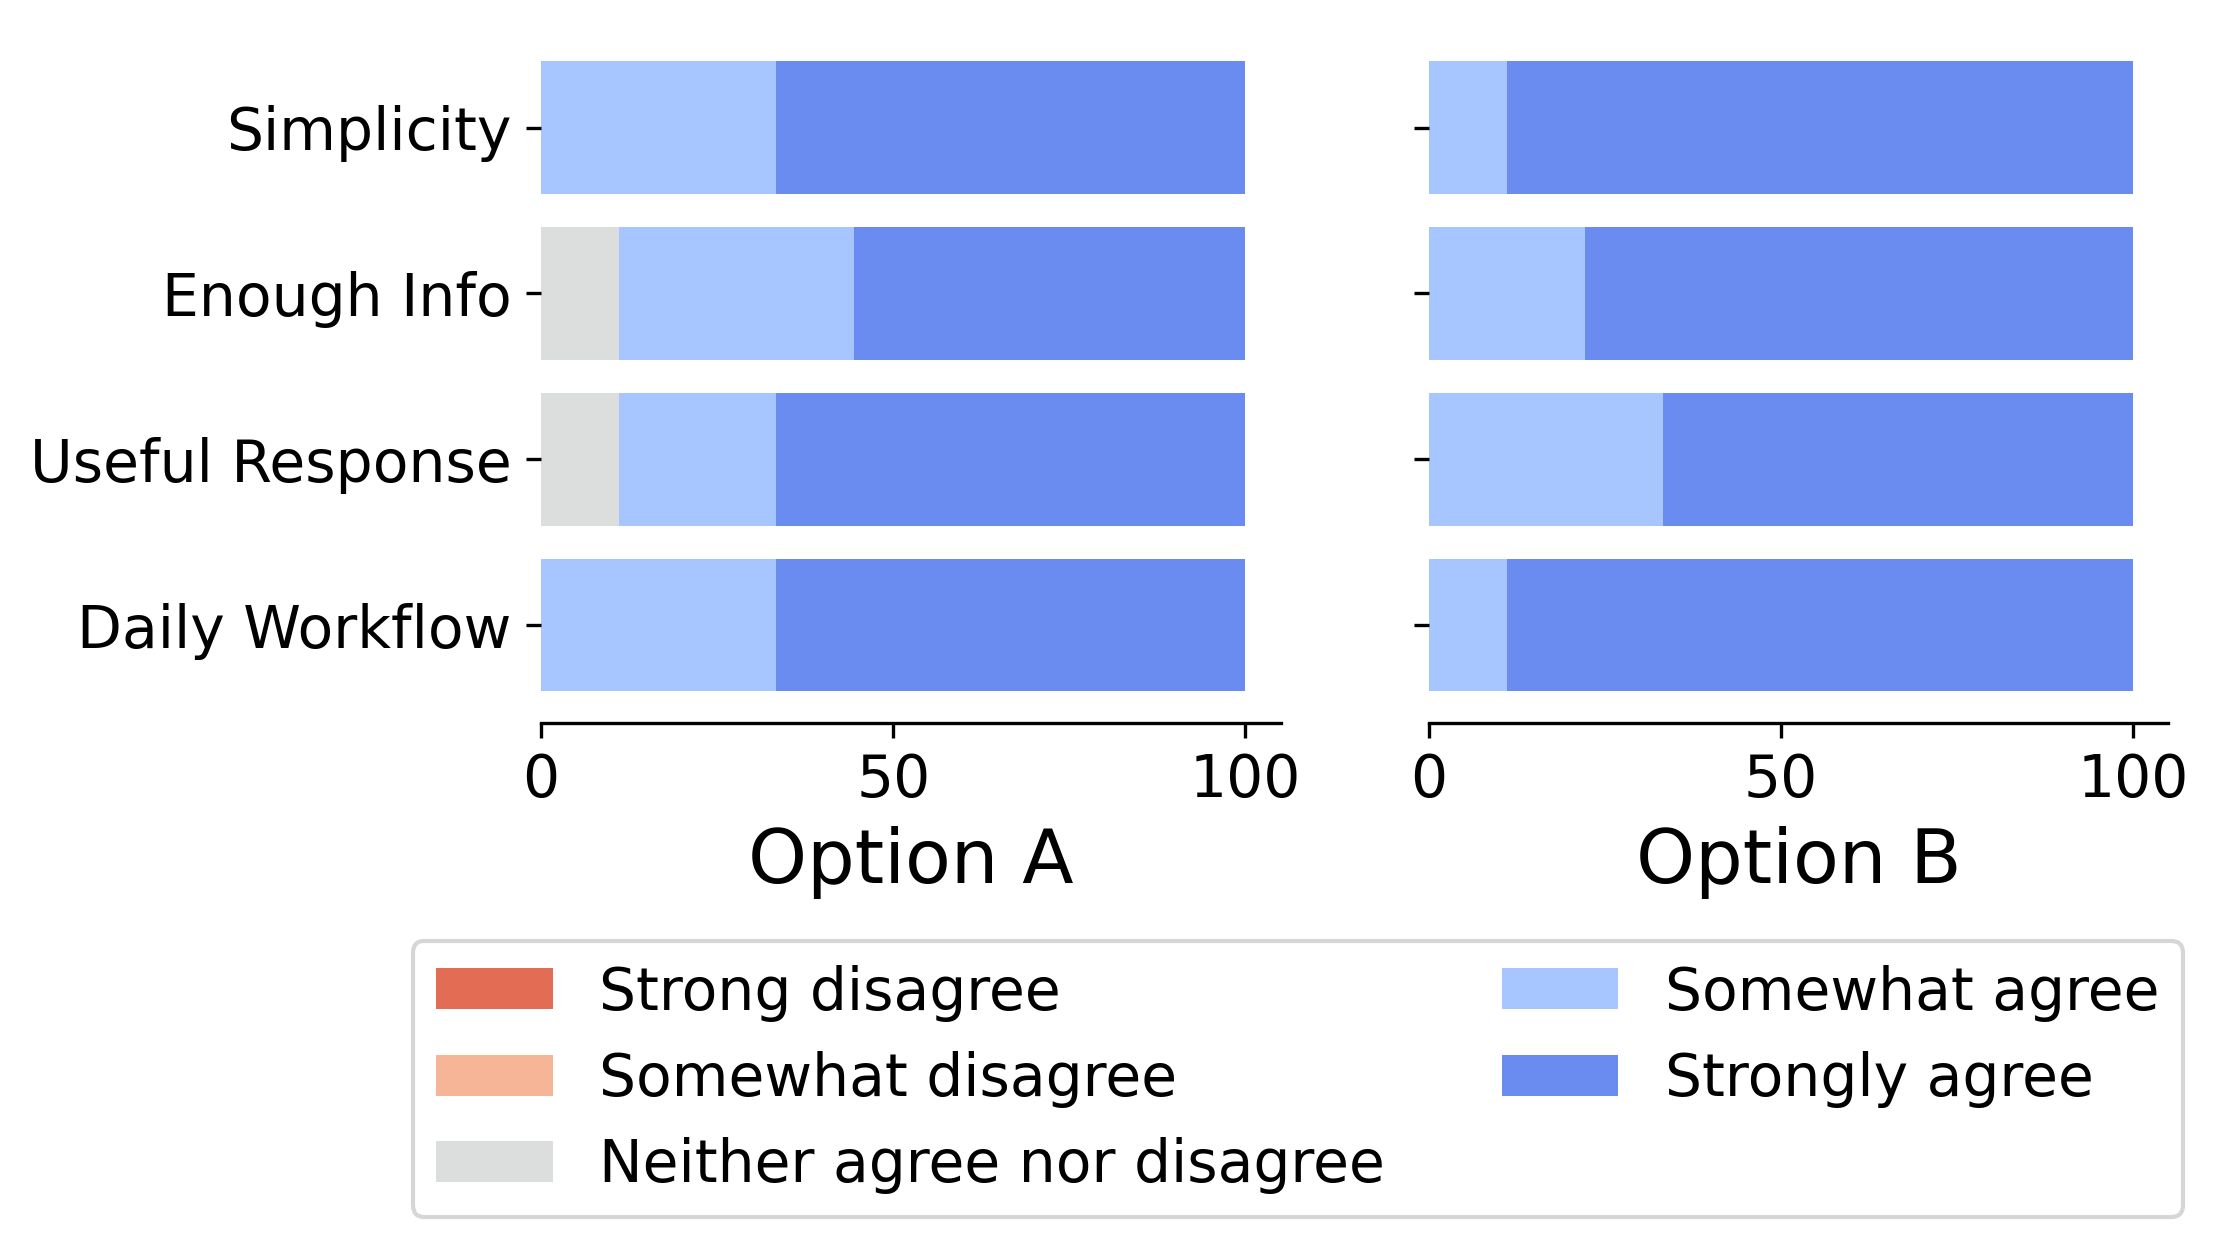

In [161]:
plot_dimensions = (1,2)
y_labels = [["",""]]
x_labels = [["Option A","Option B"]]
titles = [["",""]]
overall_format = {'figsize':(7,3),
    'style_size': style_size,
    'y_ticks': [[[[0,1,2,3],usability_fields],[[0,1,2,3],['','','','']]]],
    'hide_spines': True,
    'hide_y_spine': True, 
}

fig,ax = create_axes(plot_dimensions,overall_format,y_labels=y_labels,titles=titles,x_labels=x_labels)
bar_format = {'style_size': style_size,'color_palette': 'five_color_blue_red', 'horizontal': True}

for i,option in enumerate(['A','B']):
    usability_fields = ['Simplicity','Enough Info','Useful Response','Daily Workflow'][::-1]
    usability_1a = [[i[field] for i in data_by_file['1a_usability.csv']  if i['Option'] == option] for field in usability_fields]
    categories = ["Strong disagree", "Somewhat disagree","Neither agree nor disagree", "Somewhat agree", "Strongly agree"]
    normalized_results = [get_normalized(i) for i in usability_1a]
    x_values = [[i for j in range(len(normalized_results[i]))] for i in range(len(normalized_results))]
    plot_stacked_bar(ax[0][i],x_values,normalized_results,categories,bar_format)

legend_format = {'style_size': style_size,'type': 'is_global', 'loc': 'upper left', 'ncol': 2, 'bbox_to_anchor': (0.05,-0.1)}
create_legend(fig,ax,plot_dimensions,legend_format)

fig.savefig("figures/1a_usability.pdf",dpi=300, bbox_inches='tight')

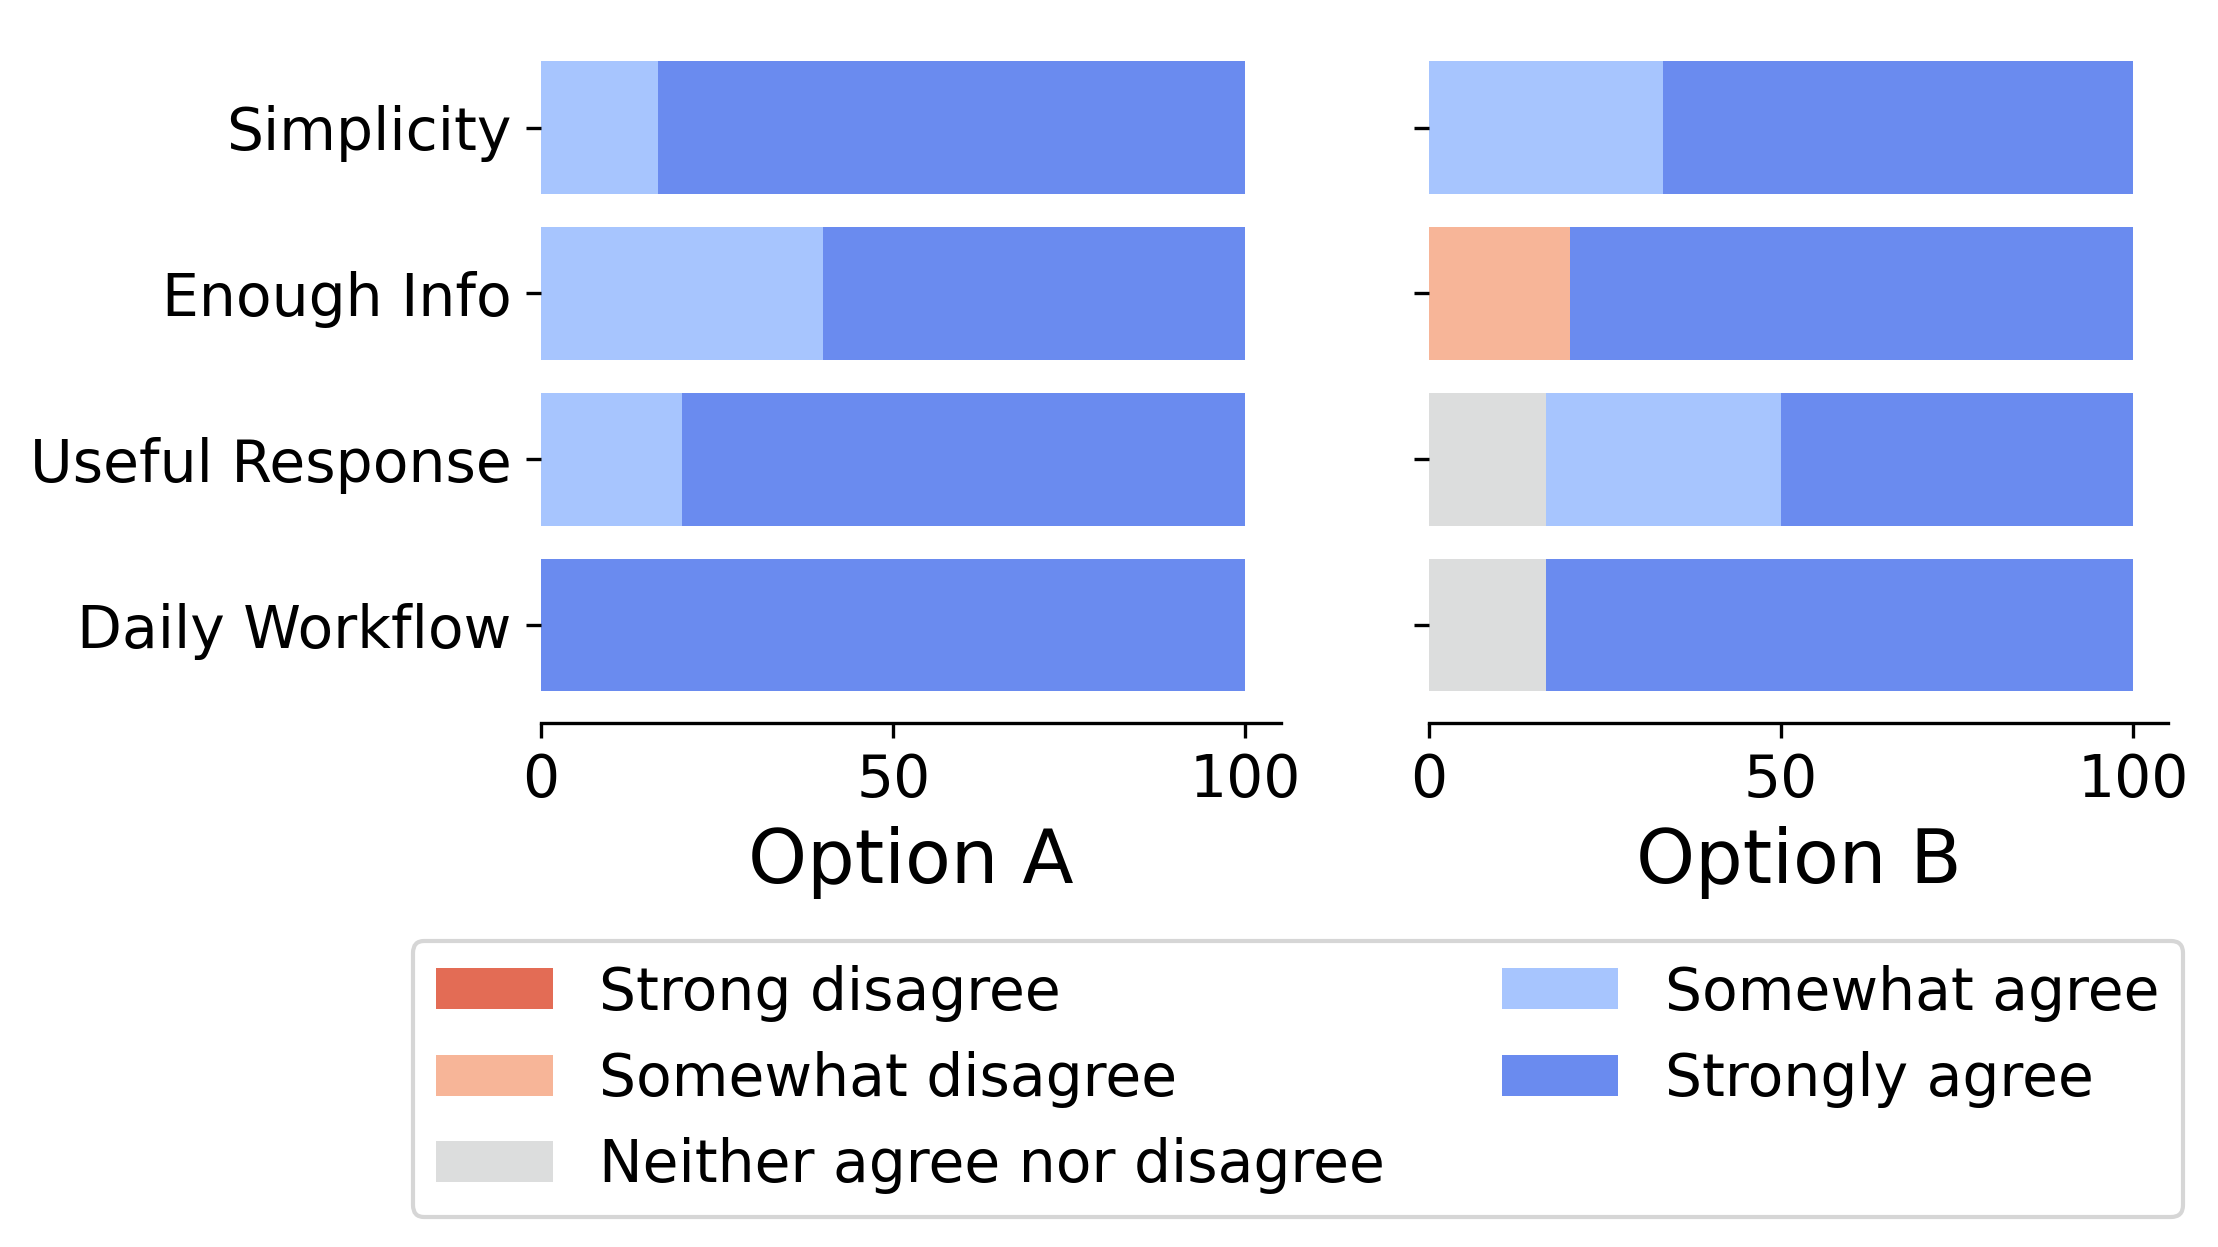

In [162]:
plot_dimensions = (1,2)
y_labels = [["",""]]
x_labels = [["Option A","Option B"]]
titles = [["",""]]
overall_format = {'figsize':(7,3),
    'style_size': style_size,
    'y_ticks': [[[[0,1,2,3],usability_fields],[[0,1,2,3],['','','','']]]],
    'hide_spines': True,
    'hide_y_spine': True, 
}

fig,ax = create_axes(plot_dimensions,overall_format,y_labels=y_labels,titles=titles,x_labels=x_labels)
bar_format = {'style_size': style_size,'color_palette': 'five_color_blue_red', 'horizontal': True}

for i,option in enumerate(['A','B']):
    usability_fields = ['Simplicity','Enough Info','Useful Response','Daily Workflow'][::-1]
    usability_1a = [[i[field] for i in data_by_file['1b_usability.csv']  if i['Option'] == option] for field in usability_fields]
    categories = ["Strong disagree", "Somewhat disagree","Neither agree nor disagree", "Somewhat agree", "Strongly agree"]
    normalized_results = [get_normalized(i) for i in usability_1a]
    x_values = [[i for j in range(len(normalized_results[i]))] for i in range(len(normalized_results))]
    plot_stacked_bar(ax[0][i],x_values,normalized_results,categories,bar_format)

legend_format = {'style_size': style_size,'type': 'is_global', 'loc': 'upper left', 'ncol': 2, 'bbox_to_anchor': (0.05,-0.1)}
create_legend(fig,ax,plot_dimensions,legend_format)

fig.savefig("figures/1b_usability.pdf",dpi=300, bbox_inches='tight')

## Comparison Results

In [163]:
comparison_fields = ['Generating Questions','Resources','Next Steps','Goals','Benefits','Wellness Dimensions','Overall'][::-1]
comparison_1a = [[i[field] for i in data_by_file['1a_comparison.csv'] ] for field in comparison_fields]
categories = ["Option B was much better", "Option B was somewhat better","About the same", "Option A was somewhat better", "Option A was much better"]
normalized_results = [get_normalized(i) for i in comparison_1a]
x_values = [[i for j in range(len(normalized_results[i]))] for i in range(len(normalized_results))]

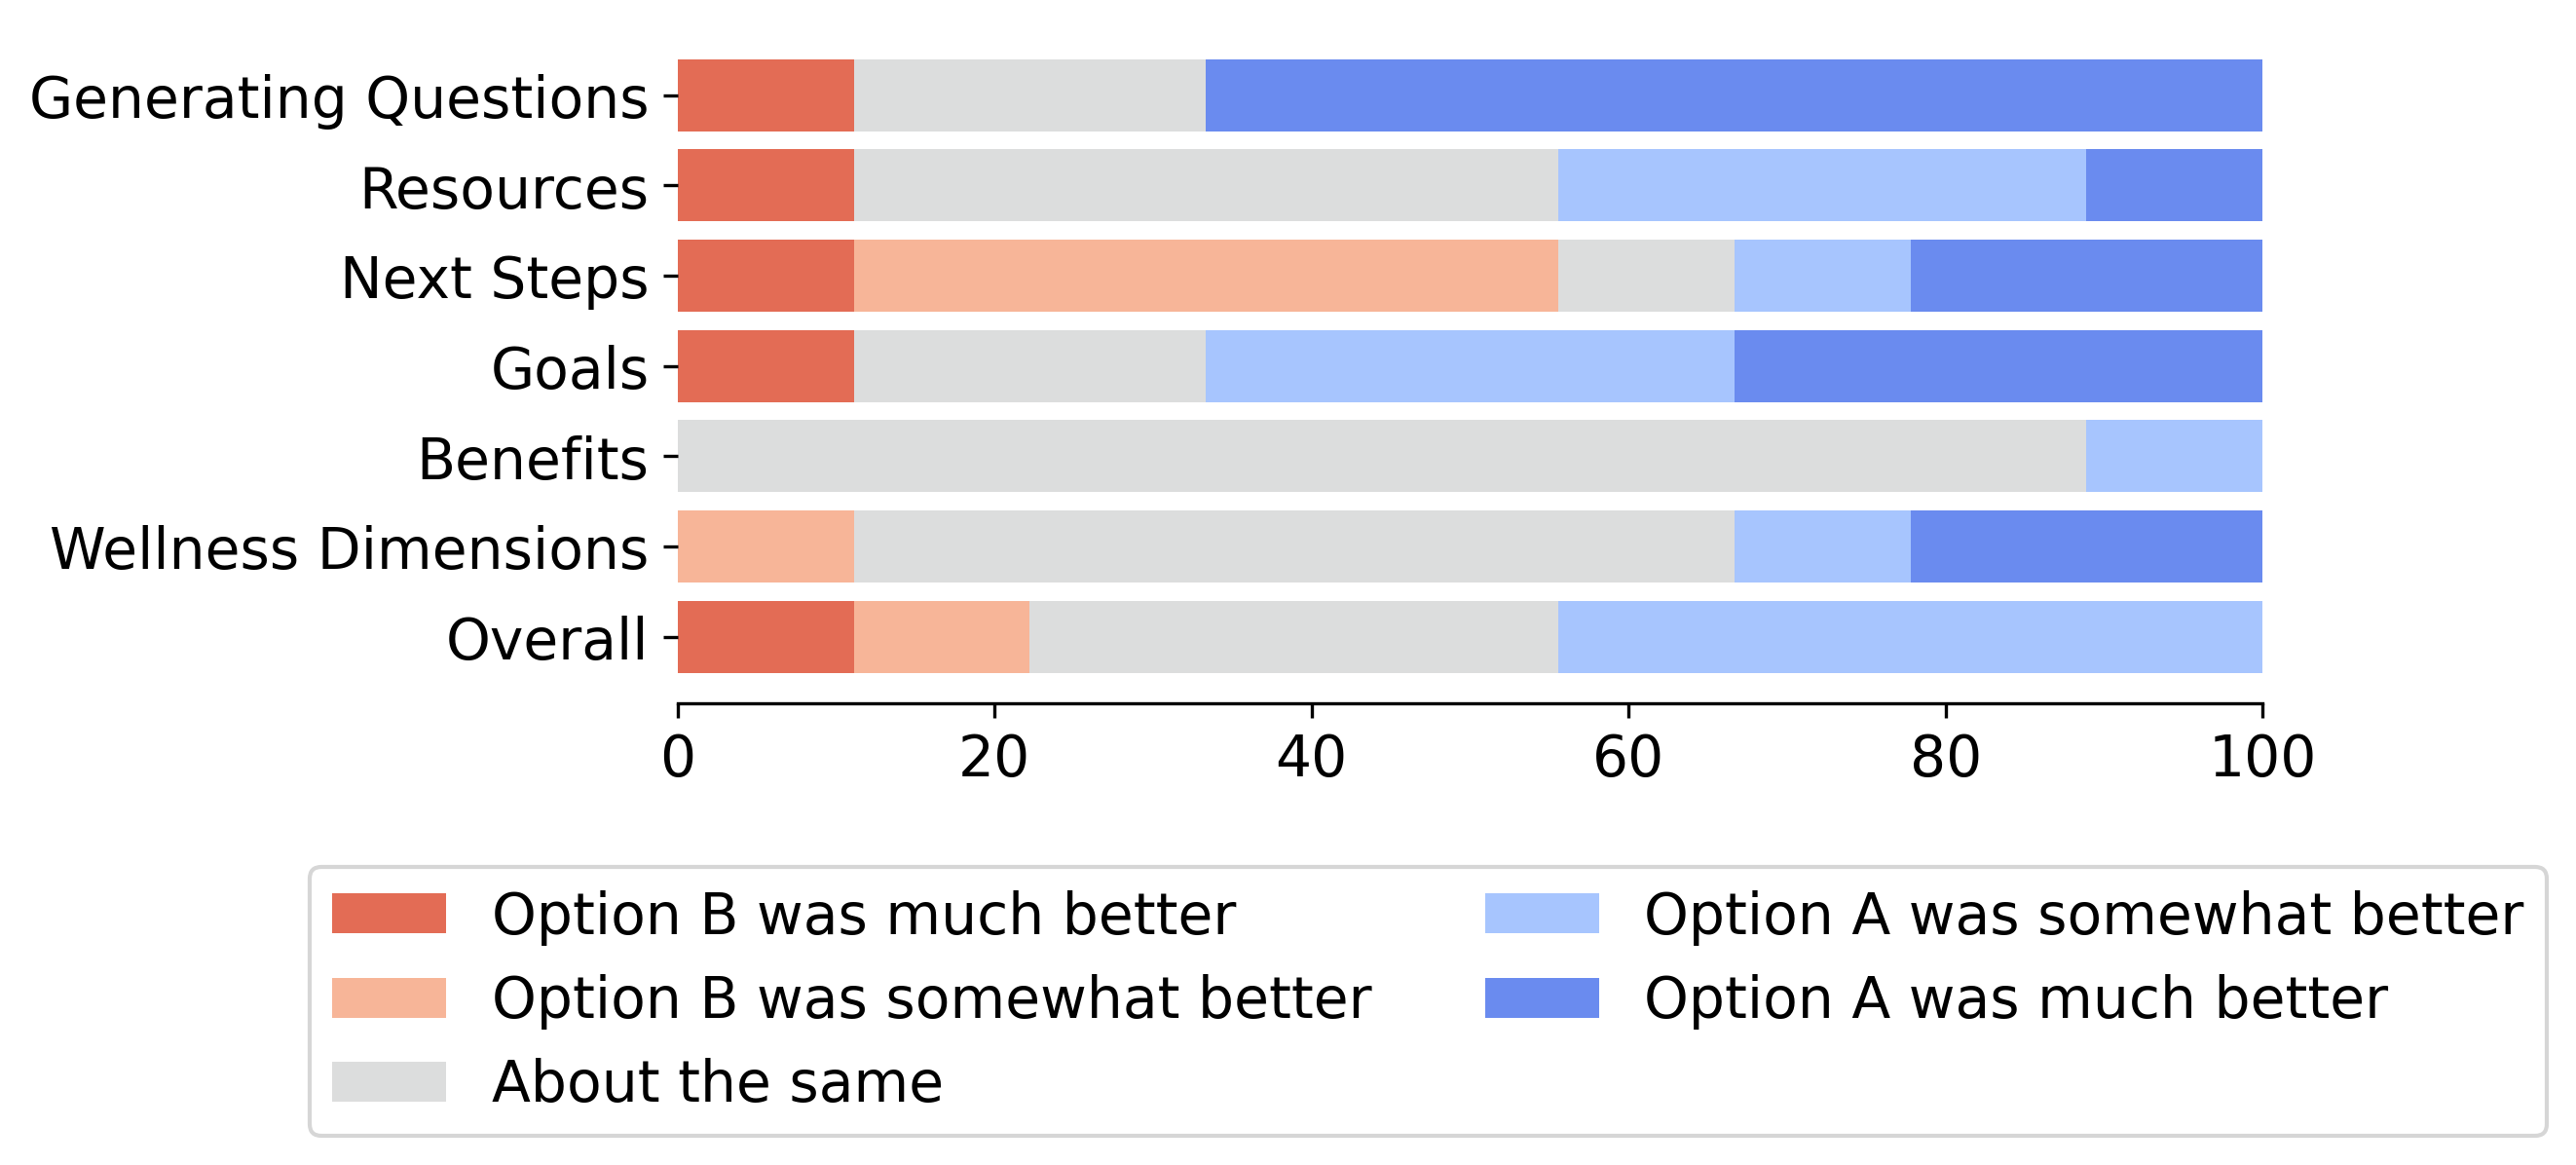

In [164]:
plot_dimensions = (1,1)
y_labels = [[""]]
x_labels = [[""]]
titles = [[""]]
overall_format = {'figsize':(7,3),
    'style_size': style_size,
    'y_ticks': [[[[0,1,2,3,4,5,6],comparison_fields]]],
    'hide_spines': True,
    'hide_y_spine': True, 
}

fig,ax = create_axes(plot_dimensions,overall_format,y_labels=y_labels,titles=titles,x_labels=x_labels)
bar_format = {'style_size': style_size,'color_palette': 'five_color_blue_red', 'horizontal': True}

plot_stacked_bar(ax[0][0],x_values,normalized_results,categories,bar_format)

legend_format = {'style_size': style_size,'type': 'is_local', 'loc': 'upper left', 'ncol': 2, 'bbox_to_anchor': (-0.25,-0.2)}
create_legend(fig,ax,plot_dimensions,legend_format)

fig.savefig("figures/1a_comparison.pdf",dpi=300, bbox_inches='tight')

In [165]:
comparison_fields = ['Resources','Next Steps','Goals','Benefits','Wellness Dimensions','Overall'][::-1]
comparison_1b = [[i[field] for i in data_by_file['1b_comparison.csv'] ] for field in comparison_fields]
categories = ["Option B was much better", "Option B was somewhat better","About the same", "Option A was somewhat better", "Option A was much better"]
normalized_results = [get_normalized(i) for i in comparison_1b]
x_values = [[i for j in range(len(normalized_results[i]))] for i in range(len(normalized_results))]

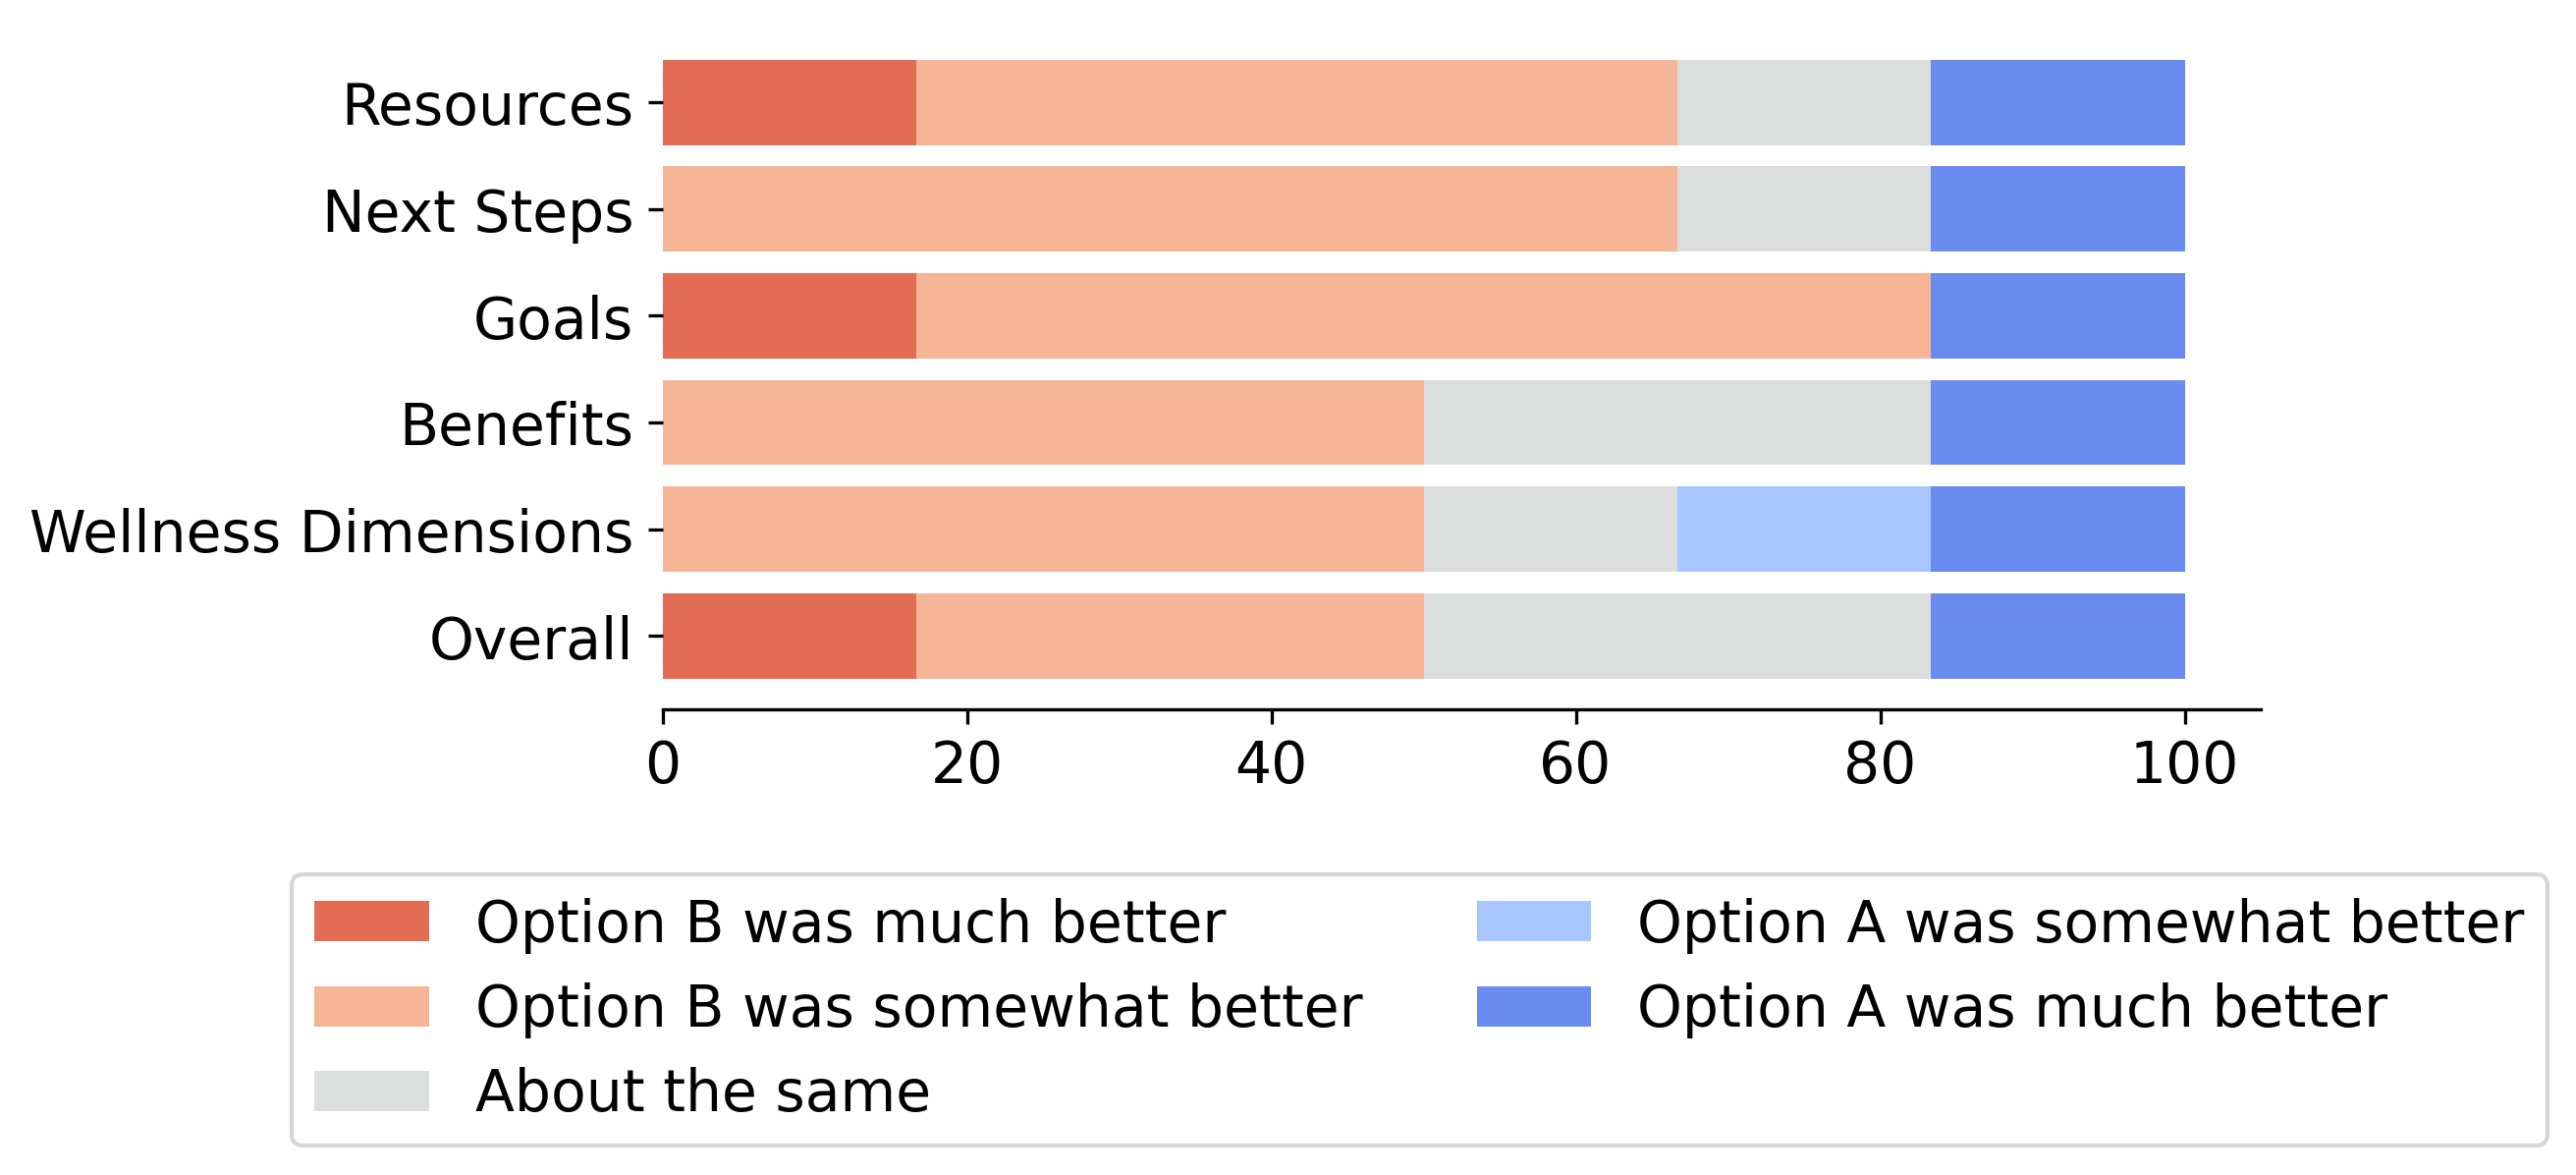

In [166]:
plot_dimensions = (1,1)
y_labels = [[""]]
x_labels = [[""]]
titles = [[""]]
overall_format = {'figsize':(7,3),
    'style_size': style_size,
    'y_ticks': [[[[0,1,2,3,4,5],comparison_fields]]],
    'hide_spines': True,
    'hide_y_spine': True, 
}

fig,ax = create_axes(plot_dimensions,overall_format,y_labels=y_labels,titles=titles,x_labels=x_labels)
bar_format = {'style_size': style_size,'color_palette': 'five_color_blue_red', 'horizontal': True}

plot_stacked_bar(ax[0][0],x_values,normalized_results,categories,bar_format)

legend_format = {'style_size': style_size,'type': 'is_local', 'loc': 'upper left', 'ncol': 2, 'bbox_to_anchor': (-0.25,-0.2)}
create_legend(fig,ax,plot_dimensions,legend_format)

fig.savefig("figures/1b_comparison.pdf",dpi=300, bbox_inches='tight')